# Bit By Bit [Activity 6](https://www.bitbybitbook.com/en/1st-ed/observing-behavior/observing-activities/)

Paper referenced can be found on Sci-hub here: https://sci-hub.tw/10.1126/science.1199644

Data source: http://books.google.com/ngrams

## Required Libraries

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

%matplotlib inline

plt.style.use(['seaborn-dark-palette'])

## 6a
Get the raw data from the Google Books NGram Viewer website. In particular, you should use version 2 of the English language corpus, which was released on July 1, 2012. Uncompressed, this file is 1.4GB.

In [2]:
ngrams = pd.read_csv("googlebooks-eng-all-1gram-20120701-1",
                  sep='\t',
                  names = ["ngram", "year", "match_count", "volume_count"])

In [3]:
total_counts = pd.read_csv("googlebooks-eng-all-totalcounts-20120701.txt",
                  lineterminator='\t',
                  names = ["year", "match_count", "page_count", "volume_count"])

In [4]:
conn = sqlite3.connect("google_ngram.db")

ngrams.to_sql('ngrams', conn)
total_counts.to_sql('total_counts', conn)

In [5]:
def run_query(q):
    with sqlite3.connect('google_ngram.db') as conn:
        return pd.read_sql(q, conn)

## 6b
Recreate the main part of figure 3a of Michel et al. (2011). To recreate this figure, you will need two files: the one you downloaded in part (a) and the “total counts” file, which you can use to convert the raw counts into proportions. Note that the total counts file has a structure that may make it a bit hard to read in. Does version 2 of the NGram data produce similar results to those presented in Michel et al. (2011), which are based on version 1 data?

In [6]:
query = '''
        SELECT
            n.year,
            n.ngram,
            CAST(n.match_count AS FLOAT)/tc.match_count match_proportion
        FROM ngrams n
        JOIN total_counts tc ON n.year=tc.year
        WHERE n.year > 1849
        AND (n.ngram = '1883' OR n.ngram = '1910' OR n.ngram = '1950')
        '''
figure_3a = run_query(query)

In [7]:
figure_3a_1883 = figure_3a[figure_3a['ngram'] == '1883']
figure_3a_1910 = figure_3a[figure_3a['ngram'] == '1910']
figure_3a_1950 = figure_3a[figure_3a['ngram'] == '1950']

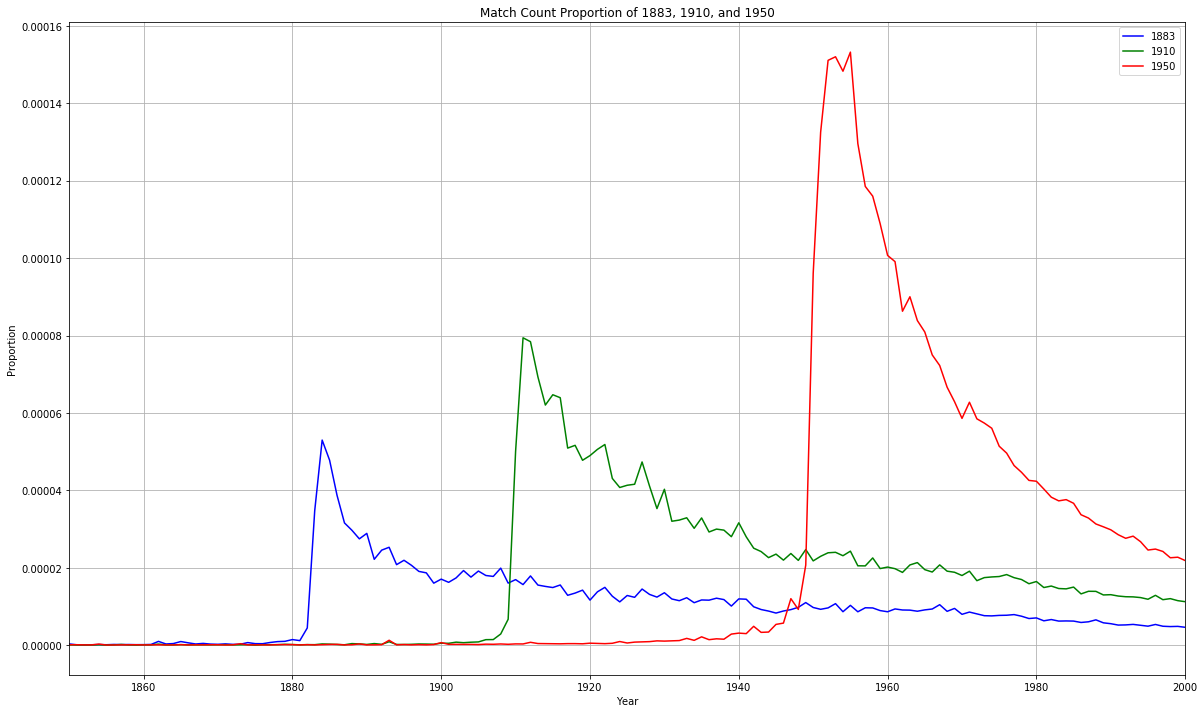

In [8]:
f, ax = plt.subplots(figsize=(20,12))

plt.plot(figure_3a_1883['year'], figure_3a_1883['match_proportion'], color='b', label='1883')
plt.plot(figure_3a_1910['year'], figure_3a_1910['match_proportion'], color='g', label='1910')
plt.plot(figure_3a_1950['year'], figure_3a_1950['match_proportion'], color='r', label='1950')

plt.title('Match Count Proportion of 1883, 1910, and 1950')
plt.xlabel('Year')
plt.ylabel('Proportion')

plt.xlim([1850, 2000])
plt.legend()
plt.grid()

plt.show()

## 6c
Now check your graph against the graph created by the NGram Viewer.

![Alt](6c ngram viewer.png)

## 6d
Recreate figure 3a (main figure), but change the y-axis to be the raw mention count (not the rate of mentions).

In [9]:
query = '''
        SELECT
            n.year,
            n.ngram,
            n.match_count
        FROM ngrams n
        JOIN total_counts tc ON n.year=tc.year
        WHERE n.year > 1849
        AND (n.ngram = '1883' OR n.ngram = '1910' OR n.ngram = '1950')
        '''
figure_3a_raw_count = run_query(query)

In [10]:
figure_3a_1883_raw_count = figure_3a_raw_count[figure_3a_raw_count['ngram'] == '1883']
figure_3a_1910_raw_count = figure_3a_raw_count[figure_3a_raw_count['ngram'] == '1910']
figure_3a_1950_raw_count = figure_3a_raw_count[figure_3a_raw_count['ngram'] == '1950']

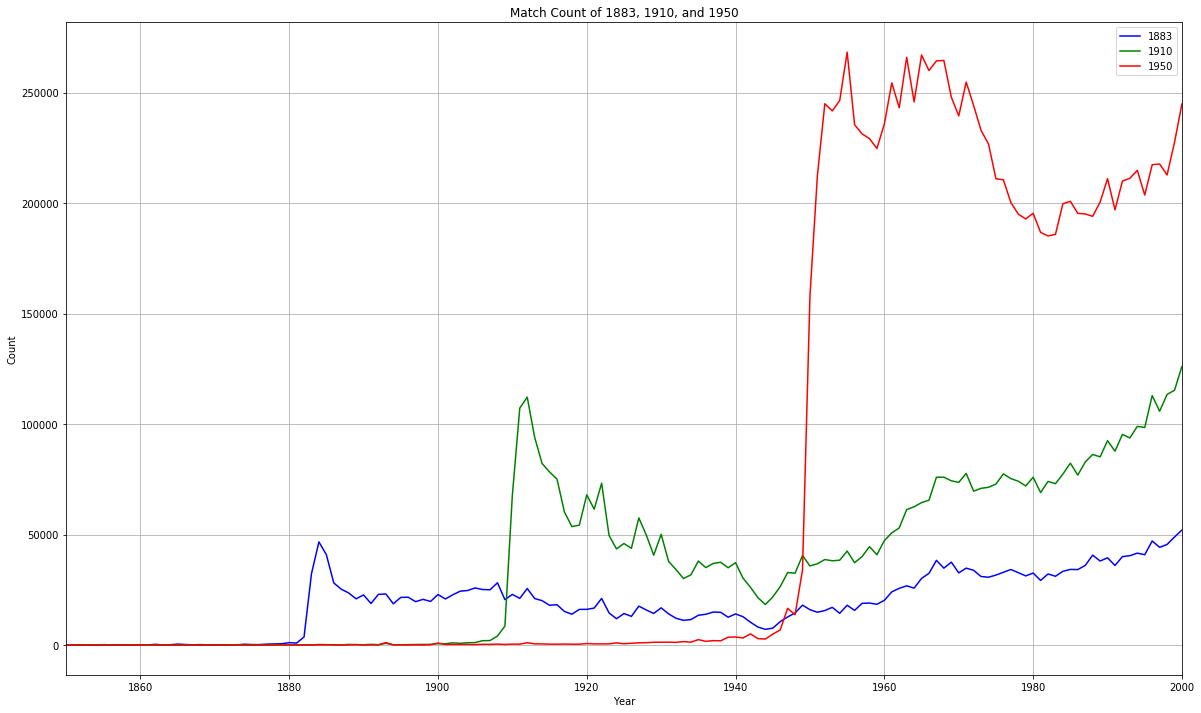

In [11]:
f, ax = plt.subplots(figsize=(20,12))

plt.plot(figure_3a_1883_raw_count['year'], figure_3a_1883_raw_count['match_count'], color='b', label='1883')
plt.plot(figure_3a_1910_raw_count['year'], figure_3a_1910_raw_count['match_count'], color='g', label='1910')
plt.plot(figure_3a_1950_raw_count['year'], figure_3a_1950_raw_count['match_count'], color='r', label='1950')

plt.title('Match Count of 1883, 1910, and 1950')
plt.xlabel('Year')
plt.ylabel('Count')

plt.xlim([1850, 2000])
plt.legend()
plt.grid()

plt.show()

## 6e
Does the difference between (b) and (d) lead you to reevaluate any of the results of Michel et al. (2011). Why or why not?

It would depend on how forgotten and what the collective means. From 6b, the conclusions are correct in that the proportion of mentions in books decreases with time. If the idea was to suggest that forgotten is measured as a proportion of the total counts then that is indeed what is being seen. If 'forgotten' is measured by the actual counts then 6d presents evidence that suggests that is indeed not the case.

The argument that 6d potentially provides evidence for is that the years are not forgotten, merely that more is being written about and thus the years become a smaller proportion of the total count of 1-grams.

## 6f
Now, using the proportion of mentions, replicate the inset of figure 3a. That is, for each year between 1875 and 1975, calculate the half-life of that year. The half-life is defined to be the number of years that pass before the proportion of mentions reaches half its peak value. Note that Michel et al. (2011) do something more complicated to estimate the half-life—see section III.6 of the Supporting Online Information—but they claim that both approaches produce similar results. Does version 2 of the NGram data produce similar results to those presented in Michel et al. (2011), which are based on version 1 data? (Hint: Don’t be surprised if it doesn’t.)

In [12]:
query = '''
        SELECT
            n.year,
            n.ngram,
            CAST(n.match_count AS FLOAT)/tc.match_count match_proportion
        FROM ngrams n
        JOIN total_counts tc ON n.year=tc.year
        WHERE n.year > 1849 AND LENGTH(n.ngram) = 4
        '''
figure_3a_inset = run_query(query)

In [13]:
def find_integers(ngram):
    return(int(''.join(filter(str.isdigit, ngram))))

figure_3a_inset['ngram'] = figure_3a_inset['ngram'].apply(find_integers)
figure_3a_inset['ngram'] = figure_3a_inset['ngram'].astype(int)
figure_3a_inset['year'] = figure_3a_inset['year'].astype(int)
figure_3a_inset = figure_3a_inset[figure_3a_inset['ngram'] > 1850]
figure_3a_inset = figure_3a_inset[figure_3a_inset['ngram'] < 2000]

In [14]:
ngrams = figure_3a_inset['ngram'].unique().tolist()

half_life = {}
for i in ngrams:
    year = figure_3a_inset[figure_3a_inset['ngram'] == i]
    year = year[year['year'] > i]
    max_match_proportion = max(year['match_proportion'])
    half = max_match_proportion/2
    for proportion in year['match_proportion']:
        if proportion < half:
            half_life_index = year[year['match_proportion'] == proportion].index[0]
            half_life[i] = year['year'].loc[half_life_index] - i
            break

In [15]:
keys = list(half_life.keys())
values = list(half_life.values())

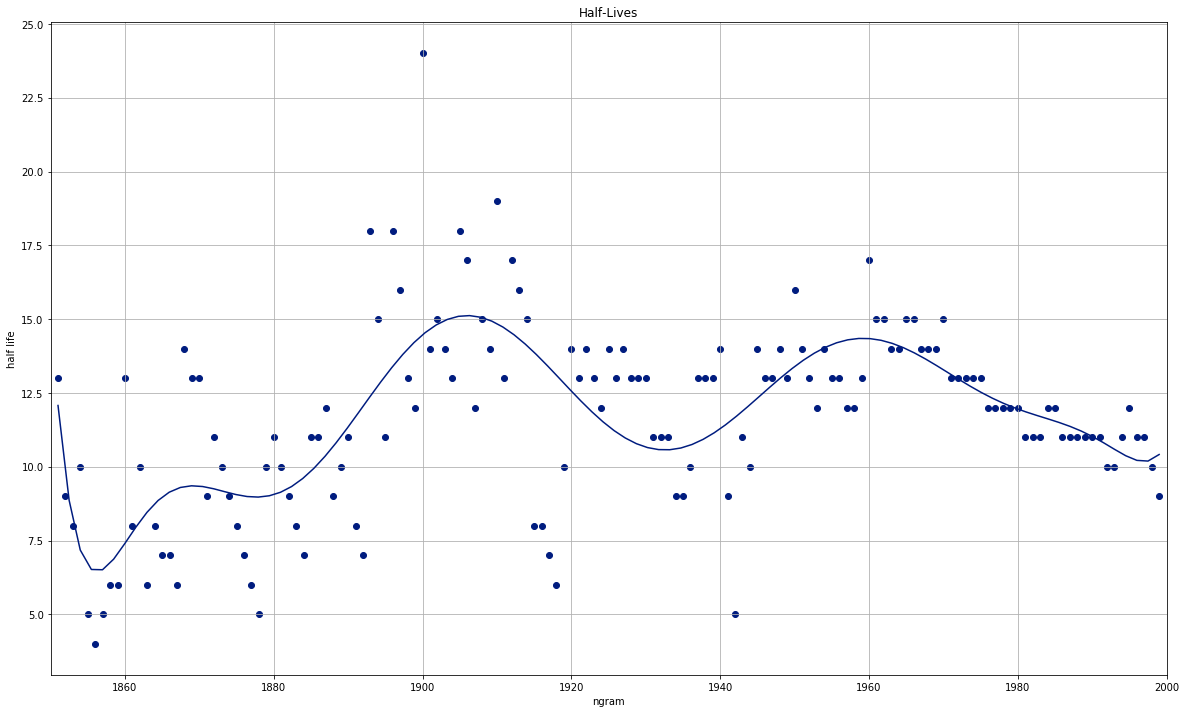

In [16]:
f, ax = plt.subplots(figsize=(20,12))

p = Polynomial.fit(keys, values, 10)
plt.plot(*p.linspace())
plt.scatter(keys, values)

plt.title('Half-Lives')
plt.xlabel('ngram')
plt.ylabel('half life')

plt.xlim([1850, 2000])
plt.grid()

plt.show()

## 6g
Were there any years that were outliers such as years that were forgotten particularly quickly or particularly slowly? Briefly speculate about possible reasons for that pattern and explain how you identified the outliers.

It's difficult for me to pinpoint an outlier here. The plot created here is drastically different to that produced in the paper. Using the polynomial fit to determine what would be considered outliers, 1900 stands out as the year with the longest half-life. Presumably the 1900 is the beginning/end of the century and thus gets referenced much more than individual years.

To me, it is surprising that the years of the two world wars do not have longer half-lives as they are significant events of history that I expected to continually be referenced. The years of the first world war appear to have lower half-lives than the polynomial fit and the half-lives of the years surrounding 1914-1918. 

## 6h
Now replicate this result for version 2 of the NGrams data in Chinese, French, German, Hebrew, Italian, Russian and Spanish.

In [17]:
english_ngrams = "googlebooks-eng-all-1gram-20120701-1"
english_total_counts = "googlebooks-eng-all-totalcounts-20120701.txt"
chinese_ngrams = "googlebooks-chi-sim-all-1gram-20120701-1"
chinese_total_counts = "googlebooks-chi-sim-all-totalcounts-20120701.txt"
french_ngrams = "googlebooks-fre-all-1gram-20120701-1"
french_total_counts = "googlebooks-fre-all-totalcounts-20120701.txt"
german_ngrams = "googlebooks-ger-all-1gram-20120701-1"
german_total_counts = "googlebooks-ger-all-totalcounts-20120701.txt"
hebrew_ngrams = "googlebooks-heb-all-1gram-20120701-1"
hebrew_total_counts = "googlebooks-heb-all-totalcounts-20120701.txt"
italian_ngrams = "googlebooks-ita-all-1gram-20120701-1"
italian_total_counts = "googlebooks-ita-all-totalcounts-20120701.txt"
russian_ngrams = "googlebooks-rus-all-1gram-20120701-1"
russian_total_counts = "googlebooks-rus-all-totalcounts-20120701.txt"
spanish_ngrams = "googlebooks-spa-all-1gram-20120701-1"
spanish_total_counts = "googlebooks-spa-all-totalcounts-20120701.txt"

In [18]:
def find_integers(ngram):
    return(int(''.join(filter(str.isdigit, ngram))))

In [19]:
def load_data(ngrams, total_counts):
    ngrams = pd.read_csv(ngrams,
                         sep='\t',
                         names = ["ngram", "year", "match_count", "volume_count"])
    
    total_counts = pd.read_csv(total_counts,
                               lineterminator='\t',
                               names = ["year", "total_match_count", "total_page_count", "total_volume_count"])
    
    dataset = pd.merge(ngrams, total_counts, on="year")
    
    dataset['match_count'] = dataset['match_count'].astype(float)
    dataset['match_proportion'] = dataset['match_count']/dataset["total_match_count"]
    
    dataset = dataset.loc[:,['ngram','year','match_proportion']]
    
    dataset = dataset[~(dataset['ngram'].str.len() > 4)]
    dataset = dataset[dataset['year'] > 1849]

    dataset['ngram'] = dataset['ngram'].apply(find_integers)
    dataset['ngram'] = dataset['ngram'].astype(int)
    dataset['year'] = dataset['year'].astype(int)
    dataset = dataset[dataset['ngram'] > 1849]
    dataset = dataset[dataset['ngram'] < 2001]

    return dataset

In [20]:
def get_half_life(dataset):
    ngrams = dataset['ngram'].unique().tolist()
    half_life = {}
    
    for i in ngrams:
        year = dataset[dataset['ngram'] == i]
        year = year[year['year'] > i]
        max_match_proportion = max(year['match_proportion'])
        half = max_match_proportion/2
        for proportion in year['match_proportion']:
            if proportion < half:
                half_life_index = year[year['match_proportion'] == proportion].index[0]
                half_life[i] = year['year'].loc[half_life_index] - i
                break
    
    return half_life

In [21]:
english = load_data(english_ngrams, english_total_counts)
english_half_life = get_half_life(english)
english_keys = list(english_half_life.keys())
english_values = list(english_half_life.values())
english_p = Polynomial.fit(english_keys, english_values, 10)

chinese = load_data(chinese_ngrams, chinese_total_counts)
chinese_half_life = get_half_life(chinese)
chinese_keys = list(chinese_half_life.keys())
chinese_values = list(chinese_half_life.values())
chinese_p = Polynomial.fit(chinese_keys, chinese_values, 10)

french = load_data(french_ngrams, french_total_counts)
french_half_life = get_half_life(french)
french_keys = list(french_half_life.keys())
french_values = list(french_half_life.values())
french_p = Polynomial.fit(french_keys, french_values, 10)

german = load_data(german_ngrams, german_total_counts)
german_half_life = get_half_life(german)
german_keys = list(german_half_life.keys())
german_values = list(german_half_life.values())
german_p = Polynomial.fit(german_keys, german_values, 10)

hebrew = load_data(hebrew_ngrams, hebrew_total_counts)
hebrew_half_life = get_half_life(hebrew)
hebrew_keys = list(hebrew_half_life.keys())
hebrew_values = list(hebrew_half_life.values())
hebrew_p = Polynomial.fit(hebrew_keys, hebrew_values, 10)

italian = load_data(italian_ngrams, italian_total_counts)
italian_half_life = get_half_life(italian)
italian_keys = list(italian_half_life.keys())
italian_values = list(italian_half_life.values())
italian_p = Polynomial.fit(italian_keys, italian_values, 10)

russian = load_data(russian_ngrams, russian_total_counts)
russian_half_life = get_half_life(russian)
russian_keys = list(russian_half_life.keys())
russian_values = list(russian_half_life.values())
russian_p = Polynomial.fit(russian_keys, russian_values, 10)

spanish = load_data(spanish_ngrams, spanish_total_counts)
spanish_half_life = get_half_life(spanish)
spanish_keys = list(spanish_half_life.keys())
spanish_values = list(spanish_half_life.values())
spanish_p = Polynomial.fit(spanish_keys, spanish_values, 10)

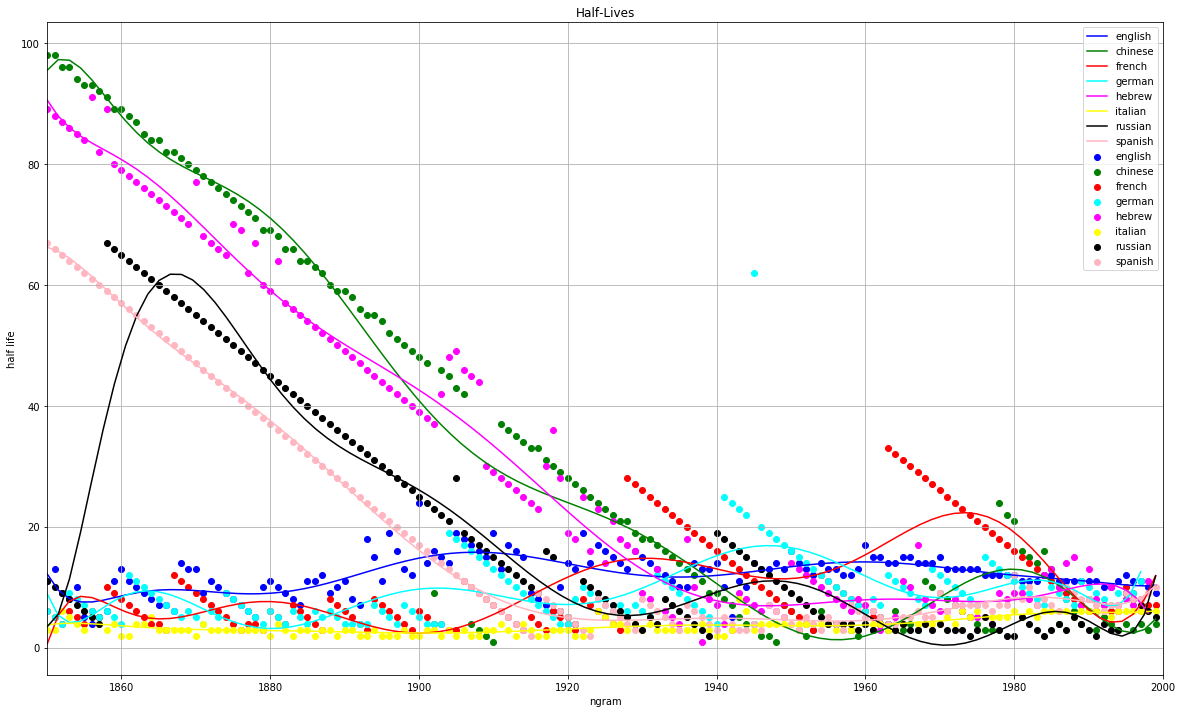

In [24]:
f, ax = plt.subplots(figsize=(20,12))

plt.plot(*english_p.linspace(), color='blue', label='english')
plt.scatter(english_keys, english_values, color='blue', label='english')

plt.plot(*chinese_p.linspace(), color='green', label='chinese')
plt.scatter(chinese_keys, chinese_values, color='green', label='chinese')

plt.plot(*french_p.linspace(), color='red', label='french')
plt.scatter(french_keys, french_values, color='red', label='french')

plt.plot(*german_p.linspace(), color='cyan', label='german')
plt.scatter(german_keys, german_values, color='cyan', label='german')

plt.plot(*hebrew_p.linspace(), color='magenta', label='hebrew')
plt.scatter(hebrew_keys, hebrew_values, color='magenta', label='hebrew')

plt.plot(*italian_p.linspace(), color='yellow', label='italian')
plt.scatter(italian_keys, italian_values, color='yellow', label='italian')

plt.plot(*russian_p.linspace(), color='black', label='russian')
plt.scatter(russian_keys, russian_values, color='black', label='russian')

plt.plot(*spanish_p.linspace(), color='lightpink', label='spanish')
plt.scatter(spanish_keys, spanish_values, color='lightpink', label='spanish')    
    
plt.title('Half-Lives')
plt.xlabel('ngram')
plt.ylabel('half life')

plt.xlim([1850, 2000])
plt.legend()
plt.grid()

plt.show()

## 6i
Comparing across all languages, were there any years that were outliers, such as years that were forgotten particularly quickly or particularly slowly? Briefly speculate about possible reasons for that pattern.

There are some extremely deviant patterns in the data. The Chinese, Hebrew, Russian and Spanish corpus illustrated a linear relationship up until around 1930. Most half lives across the corpura and across the ngrams stayed between the 0 and 20 year half life.

I imagine that with the linear relatinonships, there might have been some transition from the use of writing the years in the language of choice instead of numerics, resulting in very few instances of the numeric years being present. This may be especially true for languages that use characters instead of the alphabets, such as Chinese, Hebrew, and Russian.

This however, does not explain the linear relationship seen in the French corpus nor the Spanish. Diving deeper into how this data was first collected and cleaned might shed some light on why this behaviour exists but I was unable to find anything definitive on how the copura was constructed.

I did however find a note on the Chinese language:
> An additional note on Chinese: Before the 20th century, classical Chinese was traditionally used for all written communication. Classical Chinese is based on the grammar and vocabulary of ancient Chinese, and the syntactic annotations will therefore be wrong more often than they're right."